# Data Wrangling for Credit Card Default Data

### Read the raw data

In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv ("UCI_Credit_card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


#### There are variables that need to be converted to categories:
#### SEX : 
             1 - Male
             2 - Female
#### EDUCATION:
             1 - Graduate School
             2 - University
             3 - High School
             4 - Others
             5 - unknown
             6 - unknown
#### MARRIAGE:
             1 - Married
             2 - Single
             3 - Others

In [3]:
# Check for any null values in the dataset.
df.isnull().values.any()

False

In [4]:
# Check for any duplicate records in the dataset
df.duplicated().value_counts()

False    30000
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [6]:
df.rename(columns={'default.payment.next.month':'Default'}, inplace = True)

##### The education column of the dataset has many categories. It is necessary to reduce the categories for a better modelling.

In [7]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [8]:
df['EDUCATION'] = np.where(df['EDUCATION'] == 5 , 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 6 , 4, df['EDUCATION'])
df['EDUCATION'] = np.where(df['EDUCATION'] == 0 , 4, df['EDUCATION'])

In [9]:
df['EDUCATION'].unique()

array([2, 1, 3, 4], dtype=int64)

In [10]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

In [11]:
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 4 , 0, df['MARRIAGE'])

In [12]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

# Data Storytelling

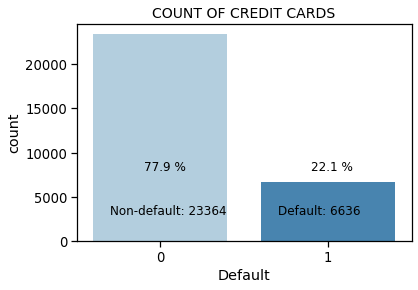

In [13]:
# The frequency of defaults
yes = df.Default.sum()
no = len(df)-yes
yes_perc = round(yes/len(df)*100,1)
no_perc = round(no/len(df)*100,1)

sns.set_context('notebook', font_scale=1.2)
sns.countplot('Default', data=df, palette='Blues')
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
plt.show()

The data is imbalanced, since just 22% of the credit cards defaulted.  

### What features might predict card client default?

To answer this main question, I will answer to the following related questions:

    1. What is the proportion of defaults between men and women?
    2. What is the proportion of defaults based on level of education?
    3. What is the proportion of defaults based on marital status?
    4. Is proportion of defaults correlated with credit limit?
    5. Is age correlated to default? 
    6. Is the history of past payments predictive of the proportion of defaults?

## 1. What is the proportion of defaults between men and women?

In [14]:
default_sex = pd.crosstab(df['Default'], df['SEX'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Male', 2: 'Female'}

default_sex.rename(index = new_index, columns = new_columns, inplace=True)
default_sex

SEX,Male,Female,All
Default,,,
Non-default,9015,14349,23364
Default,2873,3763,6636
All,11888,18112,30000


There does not seem to be any reason to think that men would be likely to default than women or vice versa.

The proportion tells us that the proportion of default for men and women is roughly the same.

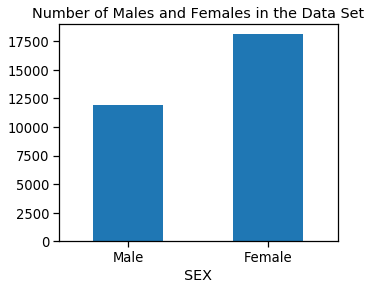

In [15]:
default_sex.loc['All'][0:2].plot.bar(figsize=(5,4), rot=0)

plt.title('Number of Males and Females in the Data Set')
plt.show()

In [16]:
#Normalize the table columns
default_sex_norm = default_sex / default_sex.loc['All']
default_sex_norm

SEX,Male,Female,All
Default,,,
Non-default,0.758328,0.792237,0.7788
Default,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


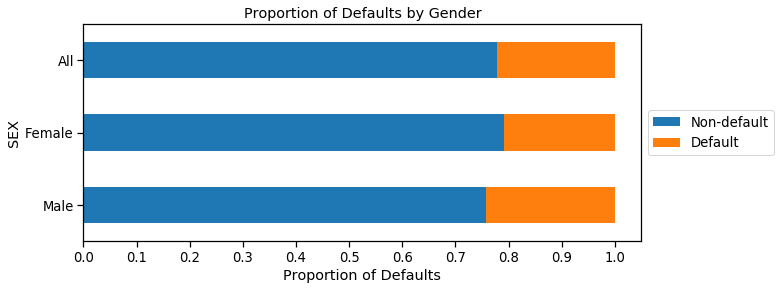

In [17]:
default_sex_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Gender')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:

* For the entire data set, approxiately 22.1% of the individuals defaulted.
* 24.2% of the males defaulted.
* 20.8% of the females defaulted.

The proportion of defaults for men is slightly higher than the proportion of defaults for women. However, this difference appears to be small and may not be statiscally significant.

#### Follow-up:
* Conduct a hypothesistest to check if the difference in teh proportion f the defaults for males and females is statistically significant.

## 2. What is the proportion of defaults based on level of education?

In [18]:
default_edu = pd.crosstab(df['Default'], df['EDUCATION'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Graduate School', 2: 'University', 3: 'High School', 4: 'Others'}

default_edu.rename(index = new_index, columns = new_columns, inplace=True)
default_edu

EDUCATION,Graduate School,University,High School,Others,All
Default,,,,,
Non-default,8549,10700,3680,435,23364
Default,2036,3330,1237,33,6636
All,10585,14030,4917,468,30000


The data set contains:
* 10,585 individuals with graduate school educations;
* 14,030 individuals with university educations;
* 4,917 individuals with high school educations; and
* 468 individual categorized as others

Below we will check whether the proportion of defaults seem to decrease (or increase) as the level of education increases. We will look at the data to see if there appears to be any relationship between the proportion of defaults and the level of education

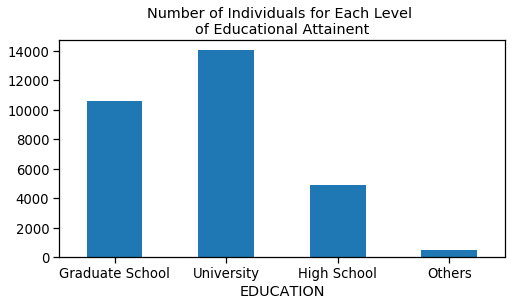

In [19]:
default_edu.loc['All'][0:4].plot.bar(figsize=(8,4), rot=0)
plt.title('Number of Individuals for Each Level \nof Educational Attainent')

plt.show()

In [20]:
default_edu_norm = default_edu / default_edu.loc['All']
default_edu_norm

EDUCATION,Graduate School,University,High School,Others,All
Default,,,,,
Non-default,0.807652,0.762651,0.748424,0.929487,0.7788
Default,0.192348,0.237349,0.251576,0.070513,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


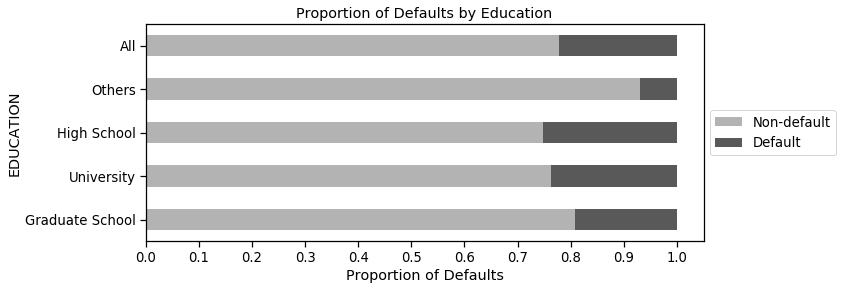

In [21]:
my_colors=['0.7','0.35',]
default_edu_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0, color=my_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Education')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:
* The proportion of defaults seems to decrease as the level of education increases

#### Follow-up:
* Conduct a hypothesis test to check if the differences in the proportion of defaults for each level of education is statistically signficant

## 3. What is the proportion of defualt based on marital status?

In [22]:
default_mar = pd.crosstab(df['Default'], df['MARRIAGE'], margins=True,normalize=False)

new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1: 'Married', 2: 'Single', 3: 'Divorce', 0: 'Others'}

default_mar.rename(index = new_index, columns = new_columns, inplace=True)
default_mar

MARRIAGE,Others,Married,Single,Divorce,All
Default,,,,,
Non-default,49,10453,12623,239,23364
Default,5,3206,3341,84,6636
All,54,13659,15964,323,30000


The data set contains information on the marital status of each individual. There are :
* 13,659 married individuals;
* 15,964 single individuals;
* 323 divorced individuals;
* 54 individuals categorized as 'others'.

Below we will check whether the proportion of defaults for each of these groups is roughly the same.

One might expect that divorced individuals would be more likely to default, because:

* The divorce process can inflict enormous legal expense;
* Divorced individuals may have larger housing costs than married couples, since divorced individuals can no longer save on housing expenses through cohabitation with their (former) spouse.

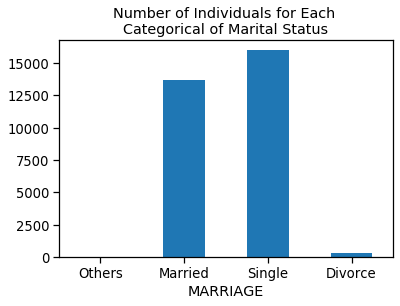

In [23]:
default_mar.loc['All'][0:4].plot.bar(figsize=(6,4), rot=0)
plt.title('Number of Individuals for Each \nCategorical of Marital Status')

plt.show()

In [24]:
default_mar_norm = default_mar / default_mar.loc['All']
default_mar_norm

MARRIAGE,Others,Married,Single,Divorce,All
Default,,,,,
Non-default,0.907407,0.765283,0.790717,0.739938,0.7788
Default,0.092593,0.234717,0.209283,0.260062,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


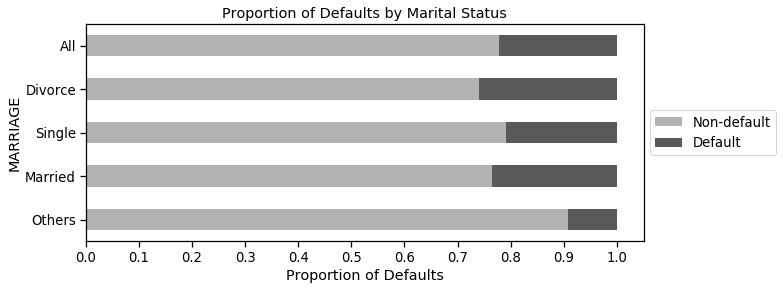

In [25]:
my_colors=['0.7','0.35',]
default_mar_norm[0:2].T.plot.barh(stacked=True,figsize=(10,4), xticks=list(np.linspace(0, 1, 11)),
                                 rot=0, color=my_colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Proportion of Defaults by Marital Status')
plt.xlabel('Proportion of Defaults')
plt.show()

#### Observations:
* The proportions of defaults seems to be highest for divorced individuals and lowest of single individuals (we are ignoring "Others").

The relatively high default rate among divorced individuals fits with our intuition that divorced individuals would be more likely to default, since:

* The divorce process can inflict enormous legal expense;
* They might have higher housing cost than married couples.

#### Follow-up
* Conduct a hypothesis test to check if the differences in the proportion of default for each category of marital status is statistically significant

## 4. Is the history of past repayments status predictive of the proportion of defaults?

For each observation, the data set contains payment records for the past 6 months (from April to September, 2005). There is a feature variable for each month. The variable can take on any integer value within the range of 0 to 9, where each integer stands for the following categories:

* 0: Revolving credit
* 1: Payment delay one month
* 2: Payment delay two months
* 3: Payment delay three months
* ..
* 8: Payment delay eight months
* 9: Payment delay nine months and above

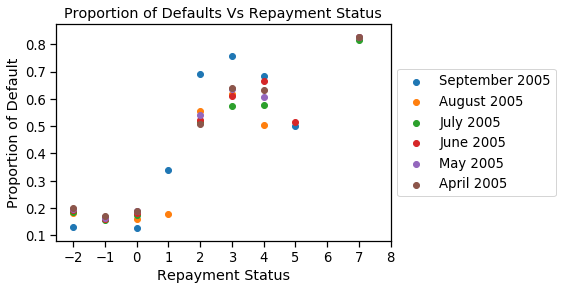

In [26]:
paymentlist = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
dict_label ={'PAY_0': 'September 2005',
            'PAY_2': 'August 2005',
            'PAY_3': 'July 2005',
            'PAY_4': 'June 2005',
            'PAY_5': 'May 2005',
            'PAY_6': 'April 2005'}

df_pay = {}

for i in paymentlist:
    df_pay[i] = df.groupby([i, 'Default']).size().unstack()
    df_pay[i] = df_pay[i][df_pay[i].sum(axis=1)>25]
    df_pay[i] = df_pay[i].div(df_pay[i].sum(axis=1), axis = 'index')
    
for i in paymentlist:
    plt.scatter(x=df_pay[i].index, y=df_pay[i][1], label=dict_label.get(i))
ticks =[-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
plt.xticks(ticks, rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.set_palette(sns.light_palette("green", reverse=True))
plt.title('Proportion of Defaults Vs Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Proportion of Default')
plt.show()

#### Observation(s):
* The proportion of defaults for observation with payment delay 2 or more months are much higher than the other observations

## 5. Is the age correlated with proportions?

In [27]:
bins = [20,30,40,50,60,70,80]
df['age_bin']=pd.cut(df['AGE'], bins)

In [28]:
df['age_bin'].value_counts()

(20, 30]    11013
(30, 40]    10713
(40, 50]     6005
(50, 60]     1997
(60, 70]      257
(70, 80]       15
Name: age_bin, dtype: int64

In [29]:
age_grouprate = df['age_bin'].value_counts() * 100 / len(df)
age_grouprate

(20, 30]    36.710000
(30, 40]    35.710000
(40, 50]    20.016667
(50, 60]     6.656667
(60, 70]     0.856667
(70, 80]     0.050000
Name: age_bin, dtype: float64

In [30]:
group_age = df.groupby('age_bin')['Default'].sum().reset_index(name='default')
group_age

,age_bin,default
0,"(20, 30]",2471
1,"(30, 40]",2189
2,"(40, 50]",1399
3,"(50, 60]",504
4,"(60, 70]",68
5,"(70, 80]",5


#### Observations:
* Age group with default shows that age group 20 to 30 default more than any other age-group.


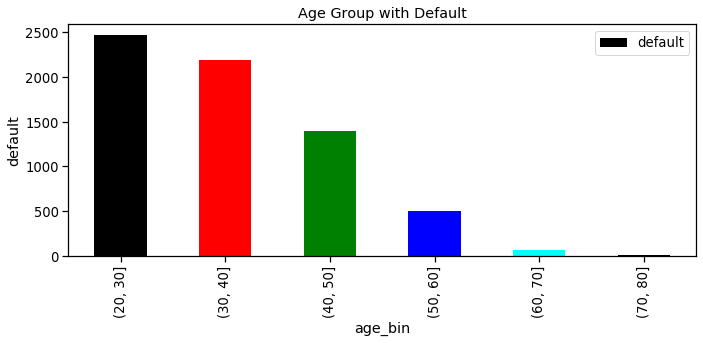

In [31]:
group_age.plot(kind='bar',x='age_bin',y='default',title='Age Group with Default',figsize=(10,5), color=['black', 'red', 'green', 'blue', 'cyan'])
plt.ylabel('default')
plt.tight_layout()

In [32]:
group_age1 = df.groupby('AGE')['Default'].sum().reset_index(name='default')
group_age1.sort_values(by="default", ascending=False).head()

,AGE,default
6,27,313
8,29,313
4,25,302
3,24,300
7,28,286


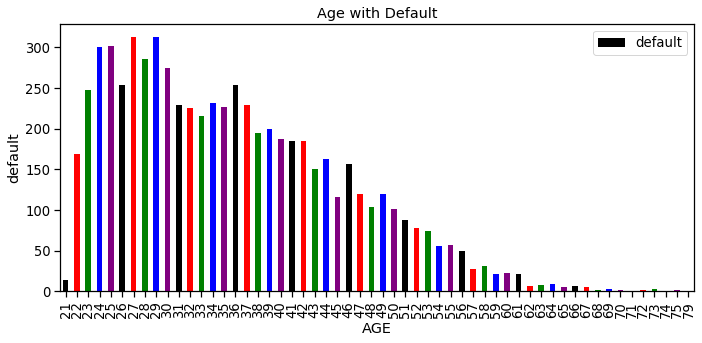

In [33]:
group_age1.plot(kind='bar',x='AGE',y='default',title='Age with Default',figsize=(10,5), color=['black', 'red', 'green', 'blue', 'purple'])
plt.ylabel('default')
plt.tight_layout()

# Inferential Statistics

In [34]:
m = df[df.SEX==1]
f = df[df.SEX==2]

In [35]:
# t-statistics
#calculate the sample mean of male and female sample default payment

sample_p_m = np.mean(m.Default)
sample_p_f = np.mean(f.Default)
# Diff in sample means of male and female
diff_p = sample_p_m - sample_p_f
n_m = len(m.Default)
n_f = len(f.Default)
var_m = np.var(m.Default)
var_f = np.var(f.Default)
#Calculate the t-value
t= diff_p / np.sqrt((var_m/n_m)+(var_f/n_f))
t

6.850205366131548

In [36]:
#calculate the degree of freedom
dof = n_m + n_f -2
dof

29998

In [37]:
# We assume equal population variance
standard_error = np.sqrt(((n_m-1)*var_m + (n_f-1)*var_f) / (n_m+n_f-2))*(np.sqrt((1/n_m)+(1/n_f)))
#the critical t-value is 1.960 for degree of freedom 29998 and alpha 0.05
margin_of_error = 1.96* standard_error
margin_of_error

0.009594833377559193

In [38]:
#Calculate the confidence interval for 95%
conf_int = [diff_p - margin_of_error, diff_p + margin_of_error]
conf_int

[0.02431463199774576, 0.04350429875286414]

In [39]:
from scipy import stats

#calculation p-value for 2-tailed test. 
p_value = stats.t.sf(t, dof)*2
print('p-value is ',p_value)

p-value is  7.516657519184393e-12


The p-value is less than level of significance 0.05, so we reject the null hypothesis

In [40]:
# Now, use the bootstrap method
def bootstrap_replicate_1d (data, func):
    return func(np.random.choice(data, size= len(data)))

#draw many bootstrap replicates
def draw_bs_reps(data, func, size=1):
    return np.array([bootstrap_replicate_1d(data, func) for _ in range(size)])

mean_diff = np.mean(m.Default) - np.mean(f.Default)
bs_replicates_m = draw_bs_reps(m.Default, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f.Default, np.mean, size=10000)
bs_diff_replicates = bs_replicates_m - bs_replicates_f
conf_interval = np.percentile(bs_diff_replicates, [2.5, 97.5])
conf_interval

array([0.0241975 , 0.04346327])

In [41]:
# To find the p-value
combined_mean = np.mean(df.Default)
#shift the samples
m_shifted = m.Default - np.mean(m.Default) + combined_mean
f_shifted = f.Default - np.mean(f.Default) + combined_mean
#get bootstrap replicates of shifted data sets
bs_replicates_m = draw_bs_reps(m_shifted, np.mean, size=10000)
bs_replicates_f = draw_bs_reps(f_shifted, np.mean, size=10000)
#compute replicates of difference of means:
bs_diff_replicates = bs_replicates_m - bs_replicates_f
#compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)
p

0.0

P-value is less than 0.05, we will reject the null hypothesis. The Sex is an important factor for default payment

# Chi-squared Test

## Gender

H0: Gender and Default are independent

Ha: Gender and Default are dependent

alpha = 0.05

df = 1

In [42]:
chi_squared_test = df.groupby(['Default','SEX']).count()['ID'].unstack()
chi_squared_test

SEX,1,2
Default,,
0,9015,14349
1,2873,3763


In [43]:
from scipy.stats import chisquare
from scipy import stats 
import scipy

In [44]:
observed = [[9015, 14349], [2873, 3763]]
chi2, p, dof, expected = scipy.stats.chi2_contingency(observed)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 47.70879689062111
DF: 1
p-value: 4.944678999412044e-12
[[ 9258.3744 14105.6256]
 [ 2629.6256  4006.3744]]


The chi-square statistics is 47.71 p-value is <0.001. The result is significant at p<0.05. We reject the null hypothesis and suggest the alternative hypothesis. The DEfault Payment is dependent on Sex 

## Education

H0: Education and Default Payment are independent

Ha: Education and Default Payment are dependent

In [45]:
chi_squared_test_education = df.groupby(['Default','EDUCATION']).count()['ID'].unstack()
chi_squared_test_education

EDUCATION,1,2,3,4
Default,,,,
0,8549,10700,3680,435
1,2036,3330,1237,33


In [46]:
obs = [[8549,10700,3680,435],[2036,3330,1237,33]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 160.4099510722455
DF: 3
p-value: 1.495064564810615e-34
[[ 8243.598  10926.564   3829.3596   364.4784]
 [ 2341.402   3103.436   1087.6404   103.5216]]


The chi squared test p-value is < 0.001 The result is significant at p < 0.05 We reject the null hypothesis and suggest the alternative hypothesis. The default_payment is dependent on education.

## Marital Status

H0: Marital Status and Default Payment are independent

Ha: Marital Status and Default Payment are dependent

In [47]:
chi_squared_test_marital_status = df.groupby(['Default','MARRIAGE']).count()['ID'].unstack()
chi_squared_test_marital_status

MARRIAGE,0,1,2,3
Default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


In [48]:
obs = [[49, 10453,12623,288],[5, 3206,3341,89]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 33.3305417639086
DF: 3
p-value: 2.742928942382497e-07
[[4.20676782e+01 1.06407855e+04 1.24364521e+04 2.93694716e+02]
 [1.19323218e+01 3.01821451e+03 3.52754788e+03 8.33052838e+01]]


The chi squared test p-value is < 0.001 The result is significant at p < 0.05 We reject the null hypothesis and suggest the alternative hypothesis. The default_payment is dependent on marital_status.

## Age Group

H0: Age Group and Default Payment are independent

Ha: Age Group and Default Payment are dependent

In [49]:
chi_squared_test_age = df.groupby(['Default','age_bin']).count()['ID'].unstack()
chi_squared_test_age

age_bin  (20, 30]  (30, 40]  (40, 50]  (50, 60]  (60, 70]  (70, 80]
Default                                                            
0            8542      8524      4606      1493       189        10
1            2471      2189      1399       504        68         5

In [50]:
obs = [[8542,8524,4606,1493,189,10],[2471,2189,1399,504,68,5]]
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('chi2:',chi2)
print('DF:',dof)
print('p-value:',p)
print(expected)

chi2: 38.34223794241912
DF: 5
p-value: 3.2206355350202376e-07
[[8.5769244e+03 8.3432844e+03 4.6766940e+03 1.5552636e+03 2.0015160e+02
  1.1682000e+01]
 [2.4360756e+03 2.3697156e+03 1.3283060e+03 4.4173640e+02 5.6848400e+01
  3.3180000e+00]]


The chi squared test p-value is < 0.001 The result is significant at p < 0.05 We reject the null hypothesis and suggest the alternative hypothesis. The default_payment is dependent on age.

Building Pipeline

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, recall_score, confusion_matrix
%matplotlib inline
warnings.filterwarnings('ignore')

In [52]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin

# Class Columns used to apply features transformation
class Columns(BaseEstimator, TransformerMixin):
    def __init__(self, names=None):
        self.names = names

    def fit(self, X, y=None, **fit_params):
        return self

    def transform(self, X):
        return X[self.names]

# List of numerical features
numeric = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]

# List of categorical features
categorical = ['SEX', 'EDUCATION', 'MARRIAGE']

# Build feature engineering pipeline step
features = FeatureUnion([
        ('numeric', make_pipeline(Columns(names=numeric),StandardScaler())),
        ('categorical', make_pipeline(Columns(names=categorical),OneHotEncoder(sparse=False)))
    ])

In [56]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [110]:
tested_models = {
    'lr': LogisticRegression(),
    'rf_clf': RandomForestClassifier()
}

for model in tested_models:
    pipe = Pipeline([
        ("features", features),
        ('model', tested_models[model])
    ])

    pipe.fit(X_train, y_train)

    y_hat_test = pipe.predict(X_test)
    
    print('======================')
    print('Tested Model: ', model)
    print('======================')
    print(classification_report(y_test, y_hat_test))

Tested Model:  lr
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7052
           1       0.70      0.25      0.37      1948

    accuracy                           0.81      9000
   macro avg       0.76      0.61      0.63      9000
weighted avg       0.80      0.81      0.78      9000

Tested Model:  rf_clf
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7052
           1       0.59      0.33      0.42      1948

    accuracy                           0.81      9000
   macro avg       0.71      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



As we can see our baseline models performances are not great when looking at recall and f1 scores. Because our dataset is not equally spit between our target values (paid vs not paid following month) it might be interresting to train our models on non-imbalance dataset.

In [85]:
# Deal with imbalance using SMOTE
from imblearn.over_sampling import SMOTE

# Smote train dataset using a 50-50 split
smote = SMOTE(sampling_strategy=1)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

# Transform resample X_train into DataFrame
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_resampled.columns = X.columns

In [111]:
for model in tested_models:
    pipe = Pipeline([
        ('features', features),
        ('model', tested_models[model])
    ])

    pipe.fit(X_train_resampled, y_train_resampled)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    print(classification_report(y_test, y_hat_test))


Tested Model:  lr
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      7052
           1       0.37      0.57      0.45      1948

    accuracy                           0.70      9000
   macro avg       0.62      0.65      0.62      9000
weighted avg       0.76      0.70      0.72      9000

Tested Model:  rf_clf
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      7052
           1       0.53      0.40      0.46      1948

    accuracy                           0.79      9000
   macro avg       0.69      0.65      0.66      9000
weighted avg       0.78      0.79      0.78      9000



Notes: recall an f1-score have significantly increase after dealing with our imbalanced dataset. Some models like Logistic regression have more than double their recall score (from .25 to .58)

In [112]:
# reducing dimensionality using PCA
from sklearn.decomposition import PCA
for model in tested_models:
    pipe = Pipeline([
        ('features', features),
        ('reduce_dim', PCA()),
        ('model', tested_models[model])
    ])

    pipe.fit(X_train_resampled, y_train_resampled)

    y_hat_test = pipe.predict(X_test)

    print('======================')
    print('Tested Model: ', model)
    print('======================')
    print(classification_report(y_test, y_hat_test))

Tested Model:  lr
              precision    recall  f1-score   support

           0       0.86      0.74      0.79      7052
           1       0.37      0.57      0.45      1948

    accuracy                           0.70      9000
   macro avg       0.62      0.65      0.62      9000
weighted avg       0.76      0.70      0.72      9000

Tested Model:  rf_clf
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      7052
           1       0.45      0.45      0.45      1948

    accuracy                           0.76      9000
   macro avg       0.65      0.65      0.65      9000
weighted avg       0.76      0.76      0.76      9000



In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'lr__penalty': ['l1', 'l2'],
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

pipe = Pipeline([
    ('features', features),
    ('lr', LogisticRegression())
])

logreg_clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=1, n_jobs=1, scoring='roc_auc')

logreg_clf.fit(X_train_resampled, y_train_resampled)

print("Best logistic regression params:\n{}\n".format(logreg_clf.best_params_))
print("Best cross-validated logistic regression score: {:.2f}".format(logreg_clf.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.0s finished


Best logistic regression params:
{'lr__C': 100, 'lr__penalty': 'l2'}

Best cross-validated logistic regression score: 0.80


In [80]:
cross_val_results = cross_val_score(logreg_clf, 
                                    X_train,
                                    y_train,
                                    scoring="roc_auc", 
                                    cv=5, 
                                    n_jobs=1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   32.2s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   37.1s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   32.3s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   44.2s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   41.5s finished


In [81]:
results_mean = np.mean(cross_val_results)
print("Mean Cross validation AUC:\n{:.3f}\n".format(results_mean))

Mean Cross validation AUC:
0.724



In [91]:
param_grid = {
    'rlf__n_estimators': [1000],
    'rlf__max_features': ['auto']
}

pipe = Pipeline([
    ('features', features),
    ('rlf', RandomForestClassifier())
])

rlf_clf = GridSearchCV(pipe, param_grid = param_grid, cv = 5, verbose=1, n_jobs=1, scoring='roc_auc')
rlf_clf.fit(X_train_resampled, y_train_resampled)

print("Best Random Forest Classifier params:\n{}\n".format(rlf_clf.best_params_))
print("Best cross-validated Random Forest Classifier score: {:.2f}".format(rlf_clf.best_score_))



Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  9.3min finished


Best Random Forest Classifier params:
{'rlf__max_features': 'auto', 'rlf__n_estimators': 1000}

Best cross-validated Random Forest Classifier score: 0.93


In [93]:
rlf_cross_val_results = cross_val_score(rlf_clf, 
                                    X_train,
                                    y_train,
                                    scoring="roc_auc", 
                                    cv=5, 
                                    n_jobs=1)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.5min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.0min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.1min finished


In [94]:
results_mean = np.mean(rlf_cross_val_results)
print("Mean Cross validation AUC:\n{:.3f}\n".format(results_mean))

Mean Cross validation AUC:
0.767



Text(0.5, 0, 'False Positive Rate')

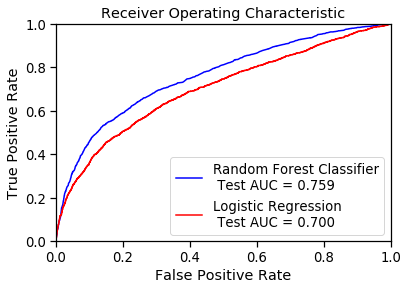

In [107]:
probs = rlf_clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc=roc_auc_score(y_test, preds)
plt.plot(fpr, tpr, 'b', label = 'Random Forest Classifier\n Test AUC = %0.3f' % roc_auc)

probs = logreg_clf.predict_proba(X_test)
preds = probs[0:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc=roc_auc_score(y_test, preds)
plt.plot(fpr, tpr, 'r', label = 'Logistic Regression\n Test AUC = %0.3f' % roc_auc)

plt.title('Receiver Operating Characteristic')
plt.legend(loc = 'lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [108]:
cross_val_accuracy = cross_val_score(rlf_clf, 
                                    X_train,
                                    y_train,
                                    scoring="accuracy", 
                                    cv=5, 
                                    n_jobs=1, 
                                    verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.1min finished


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 32.4min finished


In [109]:
accuracy_mean = np.mean(cross_val_accuracy)

print("Mean Cross validation accuracy:\n{:.3f}\n".format(accuracy_mean))

Mean Cross validation accuracy:
0.817

